# 2.3 Lab: Introduction to Julia

### 2.3.1 Basic Commands

Creation of a basic Array (1d-vector)

In [1]:
x = [1, 3, 2, 5];
@show x;

x = [1, 3, 2, 5]


Typing `?funcname` will always cause Julia to
displat additional information about the function
funcname.

We can tell Julia to add two sets of numbers together. It will then add the
first number from x to the first number from y, and so on. However, x and
y should be the same length. We can check their length using the `length()` function.

In [2]:
x = [1, 6, 2];
y = [1, 4, 3];
length(x)

3

In [3]:
length(y)

3

In [4]:
x+y

3-element Array{Int64,1}:
  2
 10
  5

The `names()` function allows us to look at a list of all of the objects( i.e. names exported by a `Module`). It is not possible to delete any object in memory in Julia. You may allocate it to `Nothing` and garbage collector will dispose it when it runs.

In [5]:
names(Main)

5-element Array{Symbol,1}:
 :Base
 :Core
 :Main
 :x
 :y

In [6]:
x = [1 3 ; 2 4]
x

2×2 Array{Int64,2}:
 1  3
 2  4

The `sqrt()` function returns the square root of element.
To find the square root of matrix/vector element-wise, using the Dot-Syntax i.e. `sqrt.(x)` .The command x.^2 raises each element of x
to the power 2; any powers are possible, including fractional or negative
powers.

In [7]:
sqrt.(x)

2×2 Array{Float64,2}:
 1.0      1.73205
 1.41421  2.0

In [8]:
x.^2

2×2 Array{Int64,2}:
 1   9
 4  16

The `randn()` function generates a vector of random normal variables, `randn()` with first argument n the sample size (a tuple of sizes). Each time we call this function, we
will get a different answer. Here we create two correlated sets of numbers,
x and y, and use the `cor()` function to compute the correlation between `cor()` them.

In [9]:
using Statistics

x = randn(50)
y = x + randn(50).*0.1 .+ 50 # mean=50 and std=0.1
cor(x,y)

0.9956045673792574

By default, `randn()` creates standard normal random variables with a mean
of 0 and a standard deviation of 1. However, the desired normal distribution can be genrated by multiplying the std and adding the mean. 

Sometimes we want our code to reproduce the exact same set of random
numbers; we can use the `Random.seed!()` function to do this. The `Random.seed!()` function takes an (arbitrary) integer argument.

In [10]:
using Random

Random.seed!(1303);

We use `Random.seed!()` throughout the labs whenever we perform calculations
involving random quantities. In general this should allow the user to reproduce our results. However, it should be noted that as new versions of
Julia become available it is possible that some small discrepancies may form
between the book and the output from Julia.

The `mean()` and `var()` functions can be used to compute the mean and variance of a Matrix/Vector of numbers. Applying `sqrt()` to the output of `var()`
will give the standard deviation. Or we can simply use the `std()` function.

In [11]:
Random.seed!(3)
y = randn(100)
mean(y)

0.09247648605294465

In [12]:
var(y)

0.8576259364891488

In [13]:
sqrt(var(y))

0.9260809556886206

In [14]:
std(y)

0.9260809556886206

### 2.3.2 Graphics

The most basic plots are line plots. Assuming you have installed `Plots.jl` via `Pkg.add("Plots")`

The `plot()` function is the primary way to plot data in Julia. For instance, `plot(x,y)` produces a lineplot of the numbers in x versus the numbers in y. (Use `scatter()` for a scatter plot)

`xlabel!()` will add a label to x-axis in the plot and `ylabel!()` respectively, a y-label.

To find out more information about the plot() function,
type ?plot.

In [7]:
using Plots

gr() #Set the backend as GR

Plots.GRBackend()

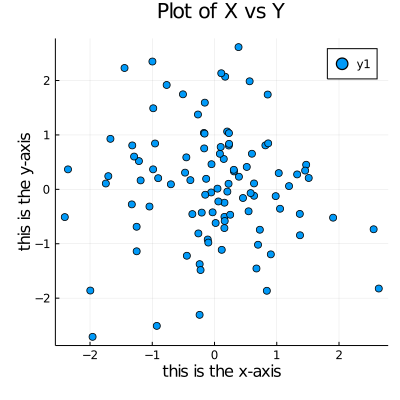

In [17]:
x = randn(100)
y = randn(100)
scatter(x,y, title="Plot of X vs Y", size=(400,400))
xlabel!("this is the x-axis")
ylabel!("this is the y-axis")

We will often want to save the output of an Julia plot. The command that we
use to do this will depend on the file type that we would like to create. For
instance, to create a pdf, we use the `savefig()` function with .pdf extension and .png for png respectively. 

In [32]:
savefig("myplot.pdf")
savefig("myplot.png")

The function `collect()` can be used to create a (vector) sequence of numbers. For `collect()` instance, `collect(a:b)` makes a vector of integers between a and b.
(Here a:b is a `UnitRange` object and a:s:b where s is the step size is a `StepRange` object)
There are
many other options: for instance, `collect(0:2:10)` makes a sequence of
even numbers from 0 to 10 with step size 2.

In [44]:
x = collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [38]:
x = 1:10
typeof(x)

UnitRange{Int64}

`collect()` takes a range object as argument. You may use the range constructor to make desirable ranges.  

In [43]:
collect(range(-pi, pi; step=0.1));
x = collect(range(-pi, pi; length=50));

We will now create some more sophisticated plots. The `contour()` produces a contour plot in order to represent three-dimensional data;
it is like a topographical map. It takes three arguments:

    1. A vector of x values(the first dimension)
    2. A vector of y values(the second dimension), and
    3. A matrix whose elements corresponding to z value (the third dimension) for each pair of (x,y) co-ordinates.
    

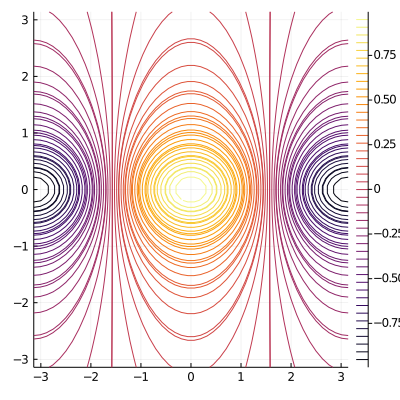

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots C:\Users\saswa\.julia\packages\Plots\uCh2y\src\backends\gr.jl:465


In [20]:
y = x
function f(x,y)
    cos(y)/(1+x^2)
end
ef = f.(x,y')
contour(x,y,ef, size=(400,400))
contour!(x,y,ef, levels=45; size=(400,400))

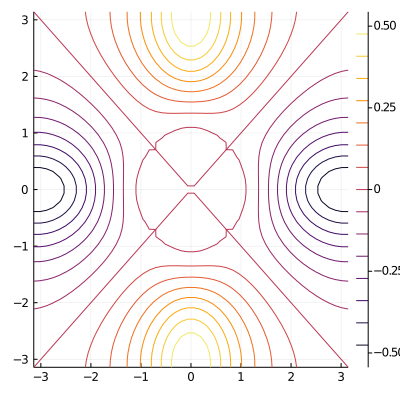

In [22]:
efa = (ef - ef')/2
contour(x, y, efa, levels=15, size=(400,400))

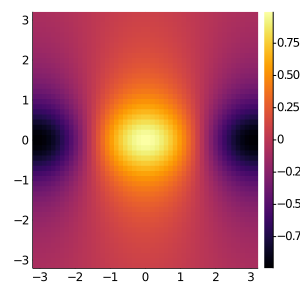

In [37]:
plot(x,y,ef, st=:heatmap, size=(300,300))

In [47]:
plotly()
plot(x,y,ef, st=:wireframe, fill=true, size=(300,300))

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots C:\Users\saswa\.julia\packages\Plots\uCh2y\src\backends.jl:372


<!DOCTYPE html>
 
 
 Plots.jl